STEP 0: imports and Reading Data

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [4]:
data = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

STEP 2 : Data Understanding
*Dataframe shape
*Head and tail
*dtypes
*Describe

In [13]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [16]:
data.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [17]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [18]:
data.shape

(550, 7)

In [19]:
data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [20]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


STEP 2 : Data preparation
*Dropping irrelevant columns and rows
*Identifying duplicated columns
*Renaming columns
*Feature creation


In [21]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [23]:
data.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [24]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool

In [25]:
data.loc[data.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [28]:
data.loc[data.duplicated(subset=['Name'])].head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [29]:
#Checking an example duplicate
data.query('Name == "A Man Called Ove: A Novel"')

,Name,Author,User Rating,Reviews,Price,Year,Genre
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction


In [38]:
data = data.loc[~data.duplicated(subset=['Name'])] \
.reset_index(drop=True).copy()

In [39]:
data.shape

(351, 7)

STEP 3 : Feature Understanding(Univariate analysis)
- Plotting Feature Distribution
-Histogram
-KDE
-Boxplot

In [44]:
data['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

In [43]:
data['Author'].value_counts()

Jeff Kinney            12
Rick Riordan           10
Stephenie Meyer         7
Bill O'Reilly           6
Dav Pilkey              6
                       ..
Eric Larson             1
Christopher Paolini     1
Jennifer Smith          1
Sarah Young             1
Jen Sincero             1
Name: Author, Length: 248, dtype: int64

Text(0, 0.5, 'count')

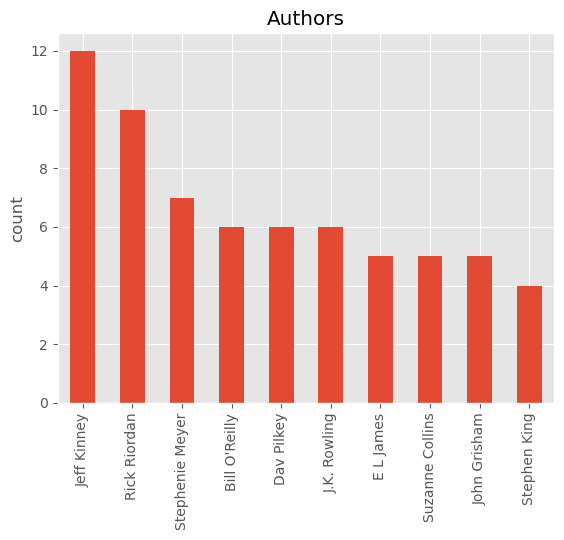

In [51]:
ax = data['Author'].value_counts() \
.head(10) \
.plot(kind='bar', title='Authors')
ax.set_ylabel('count')

Text(0.5, 0, 'Ratings')

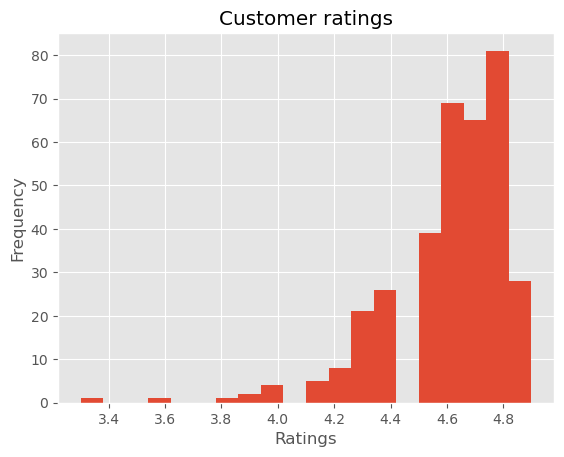

In [58]:
ax = data['User Rating'].plot(kind='hist',
                              bins=20, 
                              title ='Customer ratings')
ax.set_xlabel('Ratings')


Text(0.5, 0, 'Ratings')

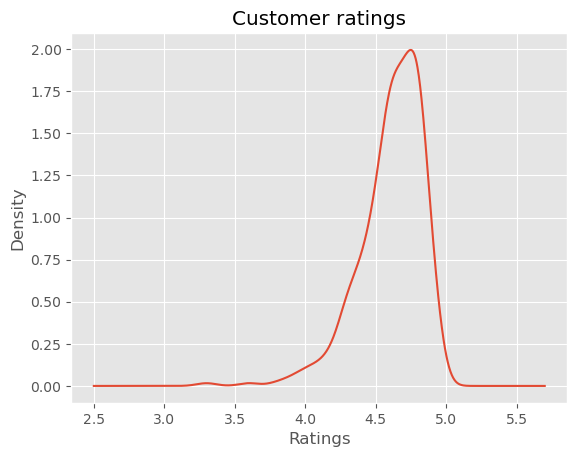

In [60]:
ax = data['User Rating'].plot(kind='kde',
                           
                              title ='Customer ratings')
ax.set_xlabel('Ratings')

STEP 4: Feature Relationships
*Scatterplot
*Heatmap correlation
*Pairplot
*Groupby comparisons

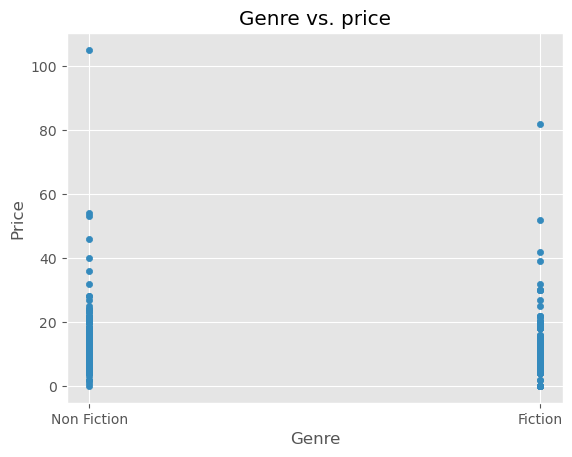

In [73]:
data.plot(kind='scatter',
          x='Genre',
          y='Price',
         title='Genre vs. price')
plt.show()
        

<AxesSubplot:xlabel='Genre', ylabel='Price'>

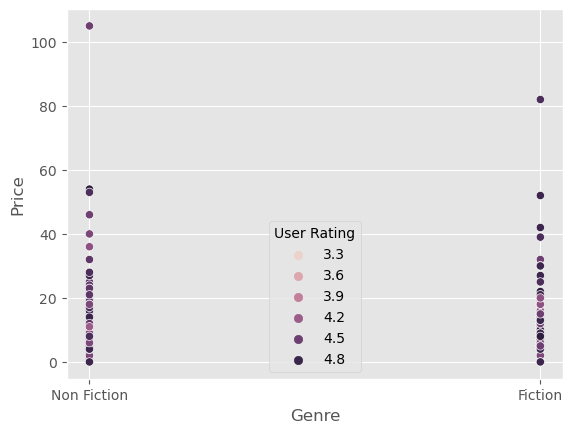

In [76]:
sns.scatterplot(x='Genre',
               y='Price',
               hue='User Rating',
               data=data)

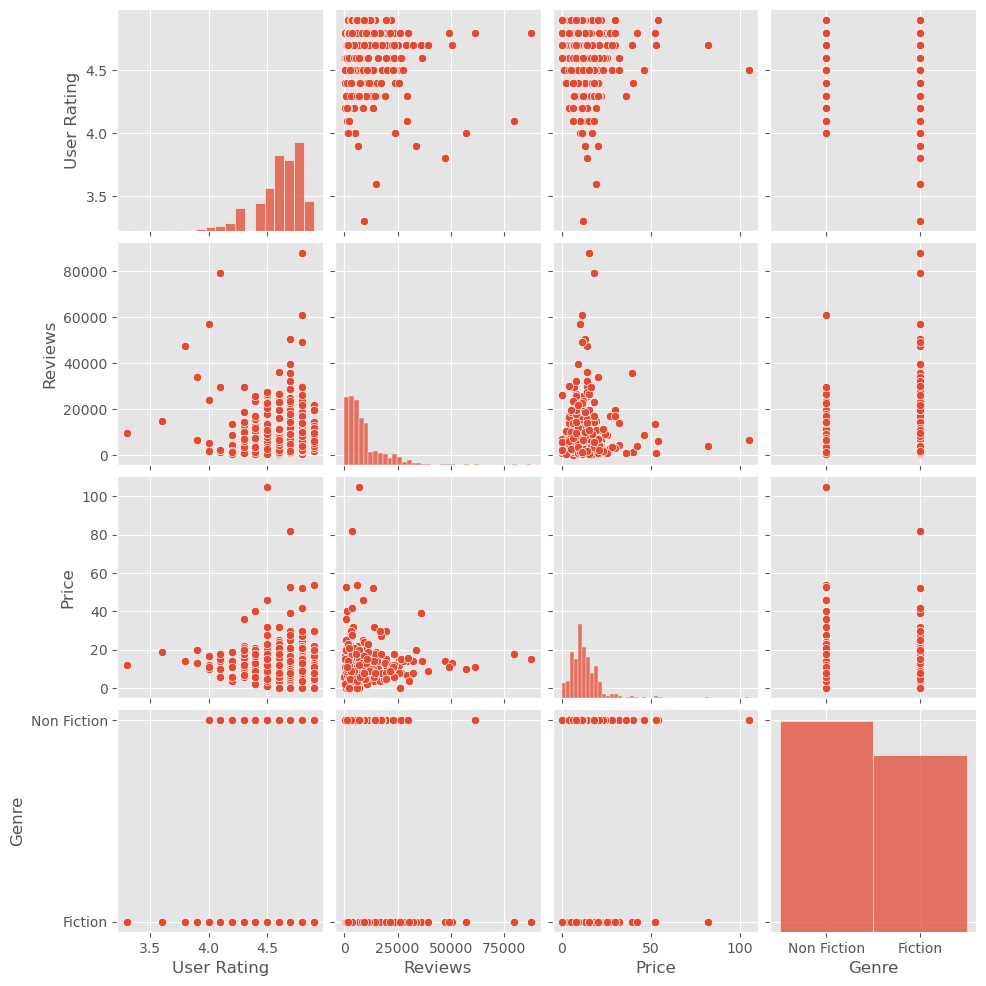

In [86]:
sns.pairplot(data,vars=['User Rating',
                        'Reviews', 
                        'Price', 
                        'Genre'])
plt.show()

In [91]:
data_corr = data[['Name','Author','User Rating', 'Reviews', 'Price','Year','Genre']].dropna().corr()
data_corr


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.055595,-0.034787,0.220793
Reviews,-0.055595,1.000000,-0.021519,0.223948
Price,-0.034787,-0.021519,1.000000,-0.133437
Year,0.220793,0.223948,-0.133437,1.000000


<AxesSubplot:>

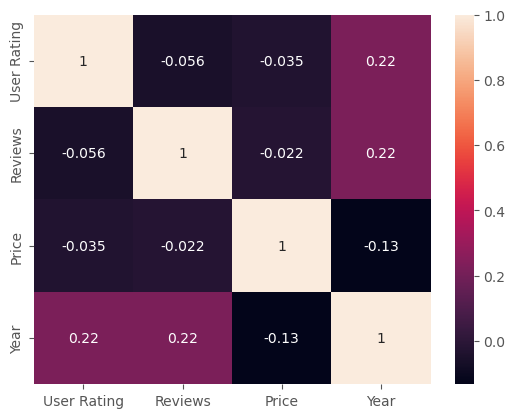

In [93]:
sns.heatmap(data_corr, annot=True)

STEP 5 : Ask a question about the data
*Answering a question about this data using a plot or statistic.

<function matplotlib.pyplot.show(close=None, block=None)>

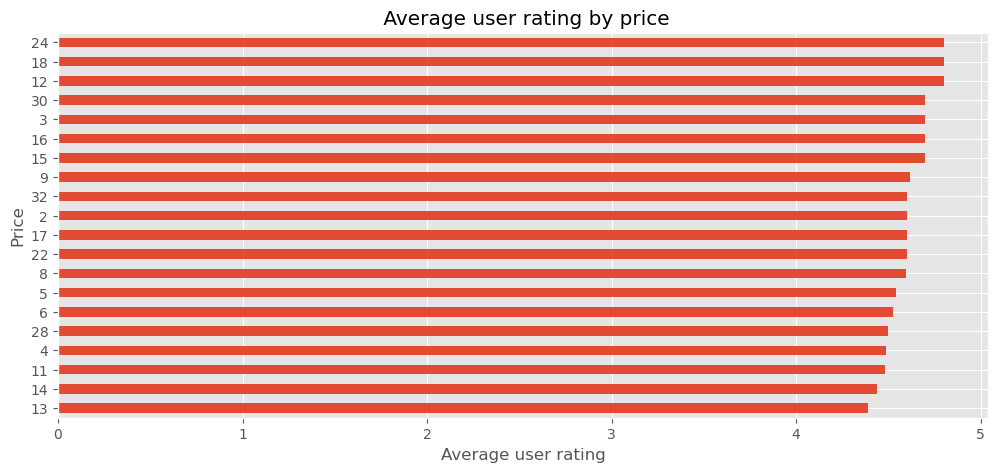

In [114]:
ax = data.query('Price') \
      .groupby('Price')['User Rating'] \
      .agg(['mean','count']) \
      .sort_values('mean') ['mean'] \
     .plot(kind='barh', figsize=(12,5), title=' Average user rating by price')
ax.set_xlabel('Average user rating')
plt.show